Intro 

Our research seeks to answer the question of identifying the classification of raisins given our data set(source). We will be using KNN K nearest neighbors classification algorithm in our project. We will be relying on (source) (literature already done and researched using SVM, ML and other methods) as a benchmark of our performance. We will analyze how the use of data given will influence or impact the results of classification, accuracy, and other performance metrics will be analyzed. With our results we will be comparing the usefulness of our methods and analysis using performance metrics against (source) (Gazi Mühendislik Bilimleri Dergisi). We will also determine which combination of sets of predictors from our given dataset produce the most accurate results, ei how much influence each data column has on predicting accurately the class of the raisin. We will perform cross validation to ensure greatest accuracy and minimal error in stratifying our training and validation subset and measure the error in our analysis. 

Source Citation in APA: 

ÇINAR İ̇lkay, KOKLU, M., &amp; TAŞDEMİR, Ş. (2020). (Classification of Raisin Grains Using Machine Vision and Artificial  Intelligence Methods) Kuru üzüm Tanelerinin Makine Görüşü ve Yapay Zeka yöntemleri Kullanılarak Sınıflandırılması. Gazi Journal of Engineering Sciences, 6(3), 200–209. https://doi.org/10.30855/gmbd.2020.03.03 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.0

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“package ‘broom’ was built under R version 4.0.2”

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Parsed with column specification:
cols(
  Area = col_double(),
  MajorAxisLength = col_double(),
  MinorAxisLength = col_double(),
  Eccentricity = col_double(),
  ConvexArea = col_double(),
  Exte

[1] "correlation mapping of our predicators"


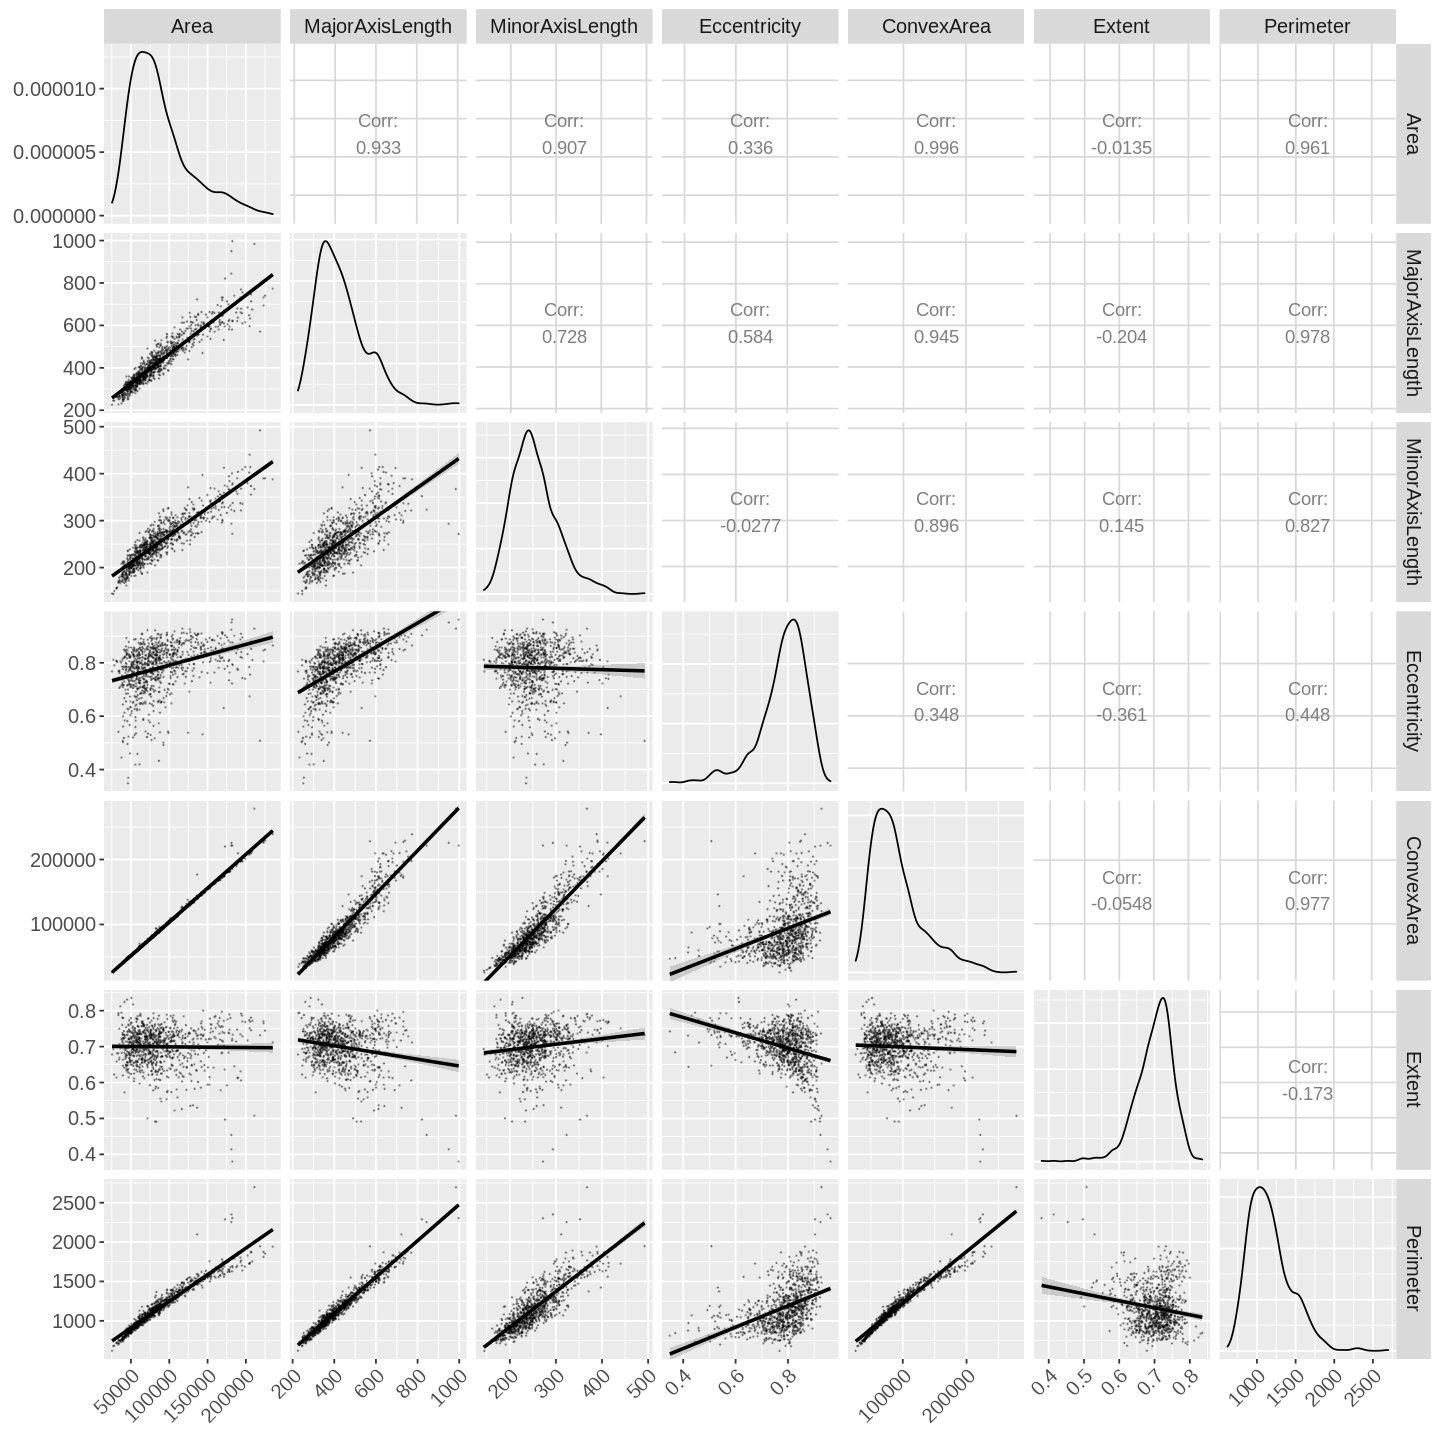

In [3]:
# downloading libraries
library(tidyverse)
library(repr)
library(GGally)
library(broom)
library(scales)

# options(repr.matrix.max.rows = 6)
options(repr.plot.height = 12, repr.plot.width = 12)
options(scipen = 999)


# seed value
set.seed(5805)

# ggpairs
raisin_data <- read_csv("https://github.com/dylankim990/DSCI100_Group_2/raw/main/data/Raisin_Dataset.csv") %>% 
    mutate(Class = as_factor(Class))

scaled_raisin_data <- raisin_data %>%
    select(Area:Perimeter) %>%
    mutate(across(everything(), scale))

raisin_data_predictors <- raisin_data %>%
    select(Area:Perimeter)

raisin_pairs <- raisin_data_predictors %>%
    ggpairs(., lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1))) + 
    theme(text = element_text(size = 15)) +
theme(axis.text.x = element_text(angle =45, hjust = 1))
print("Correlation mapping for every predictor")
raisin_pairs

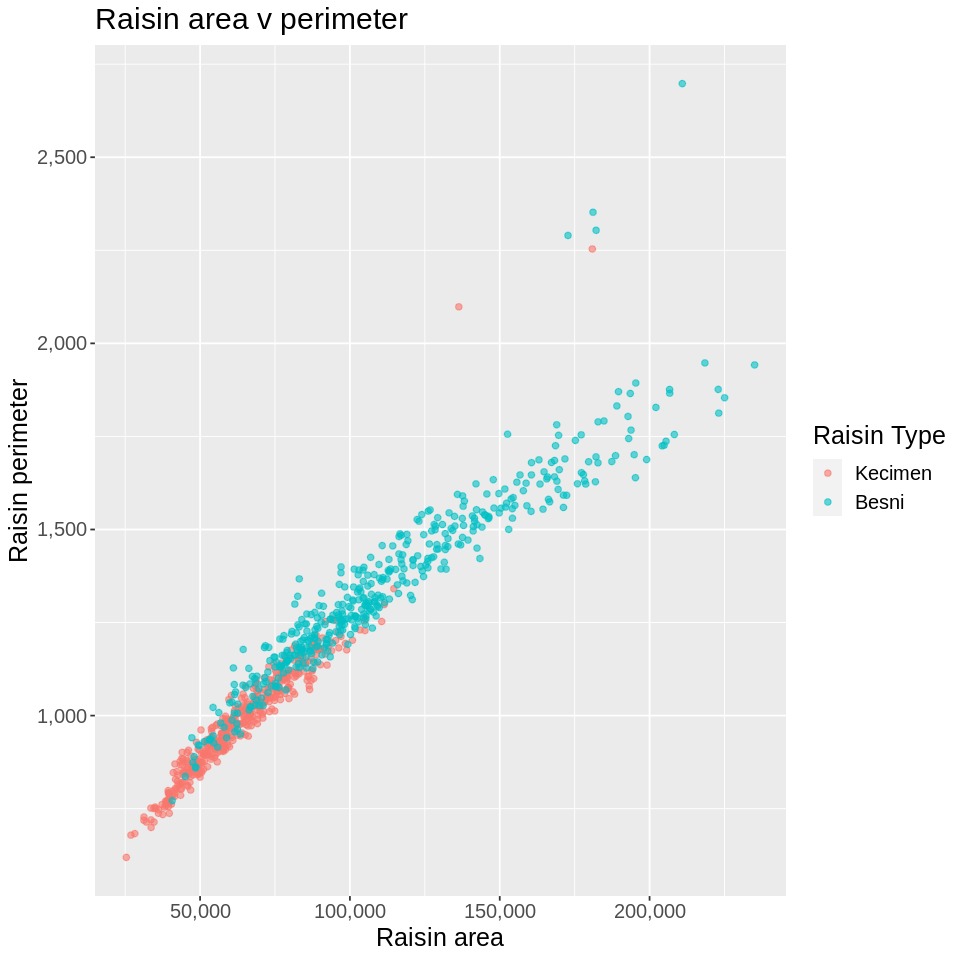

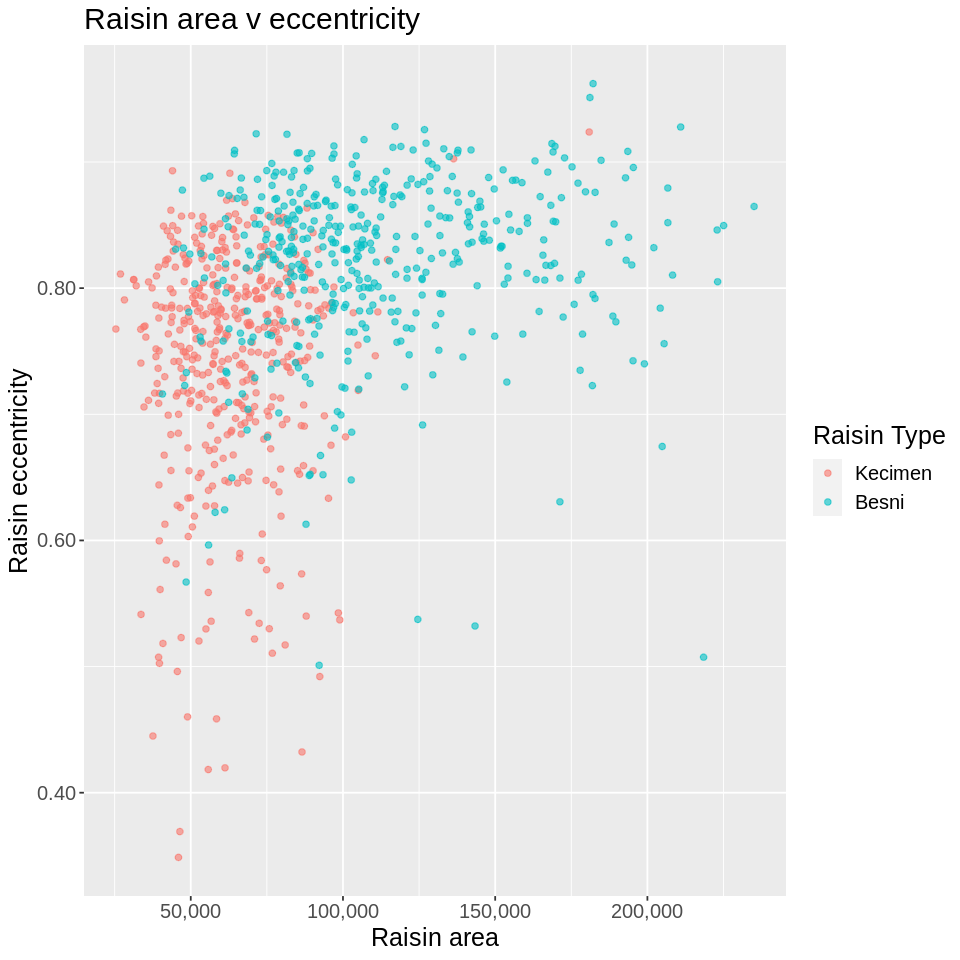

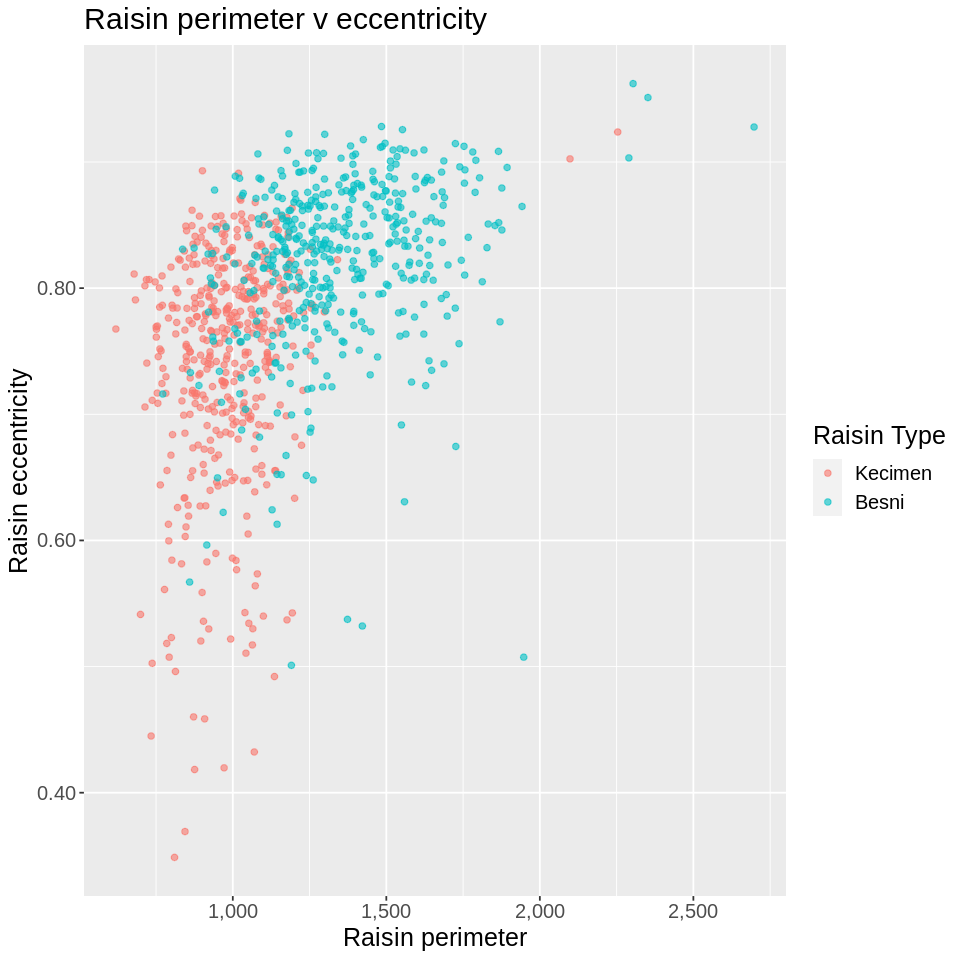

In [4]:
# options(repr.matrix.max.rows = 6)
options(repr.plot.height = 8, repr.plot.width = 8)


# setting seed
set.seed(5805)

# scatter plot: Area v Perimeter
area_perimeter_plot <- raisin_data %>%
    ggplot(aes(x = Area, y = Perimeter, color = Class)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Raisin area", 
         y = "Raisin perimeter", 
         title = "Raisin area v perimeter",
         color = "Raisin Type") +
    theme(text = element_text(size = 15))+
  scale_x_continuous(labels = label_comma()) +
  scale_y_continuous(labels = label_comma())

area_perimeter_plot

# scatter plot: Area v Eccentricity
area_eccentricity_plot <- raisin_data %>%
    ggplot(aes(x = Area, y = Eccentricity, color = Class)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Raisin area", 
         y = "Raisin eccentricity", 
         title = "Raisin area v eccentricity",
         color = "Raisin Type") +
    theme(text = element_text(size = 15))+
  scale_x_continuous(labels = label_comma()) +
  scale_y_continuous(labels = label_comma())


area_eccentricity_plot 


# scatter plot: Perimeter v Eccentricity 
perim_eccentricity_plot <- raisin_data %>%
    ggplot(aes(x = Perimeter, y = Eccentricity, color = Class)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Raisin perimeter", 
         y = "Raisin eccentricity", 
         title = "Raisin perimeter v eccentricity",
         color = "Raisin Type") +
    theme(text = element_text(size = 15))+
  scale_x_continuous(labels = label_comma()) +
  scale_y_continuous(labels = label_comma())



perim_eccentricity_plot

Firstly, I started off by making a ggpairs visualization in order to be able to build a scatterplot matrix. With this, we would be able to visualize (within a single diagram) each pair of numeric variables and the way they interact with each other, with the Pearson correlation and variable distribution also clearly stated. This was done in order to gain a deeper understanding of the data and it also allowed us to be able to identify correlations and different kinds of relationships between the variables. However, one flaw was that this would no allow us to know what type (Class) of raisin were plotted, it was simply plotting all the numerical data in the dataset (no distinction between Class). So, after we did some data analysis and prime predictor identification, we found that the predictors that would provide the most accurate predictions were Area, Perimeter, and Eccentricity. Now that we knew this, we decided to proceed and create scatterplots of the relatinoships and correlations between these specific three variables. This was done to gain an even better understanding of the variables that would become our predictors, while at the same time being able to identify what type of raisin (Class) was being plotted and what differences the types of raisins had in regards to these variables. To do this, we utilized the ggplot() function and since there were only three predictor variables, we were able to create scatterplots for each posible combination of two variables: Area v Perimeter, Area v Eccentricity, and Perimeter v Eccentricity. It was a crucial step in this process to scale all the variabels (especially for ggpairs correlation plot) because the value ranges for every column are extremely different (some in the 1000s, some less than 1). In order for our correlation/ggpairs plot and our scatter plots to not be visually misleading, we scaled the data utilizing the "scale_x_continuous" and "scale_y_continuous" functions for the scatter plot and added different aesthetic functions to the ggpairs overall function so that our graph would be clear.

Note identifiable differences between predictors for each class - how can we quantify this

Some identifiable differences found in the scatter plots between our most accurate predictors, Area, Perimeter, and Eccentricity, is that all of them show the Besni raisin type to generally be larger in area/perimeter/eccentricity than the Kecimen raisin. Another important factor to note is that all these scatter plots show a positive correlation, with the area v perimeter scatter plot having a very strong positive correlation, the strongest of all graphs. In this scatter plot, there is almost an obvious shift from Kecimen to Besni raisin types as area and perimeter increases, this elades us to believe that Besni raisins are typically larger than Kecimen raisins. 

[1] "Peak Values"


,name,value
,<chr>,<dbl>
1,Area,87524.0000000
2,MajorAxisLength,442.2460114
3,MinorAxisLength,253.2911550
4,Eccentricity,0.8197384
5,ConvexArea,90546.0000000
6,Extent,0.7586506


[1] "Distribution plot"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



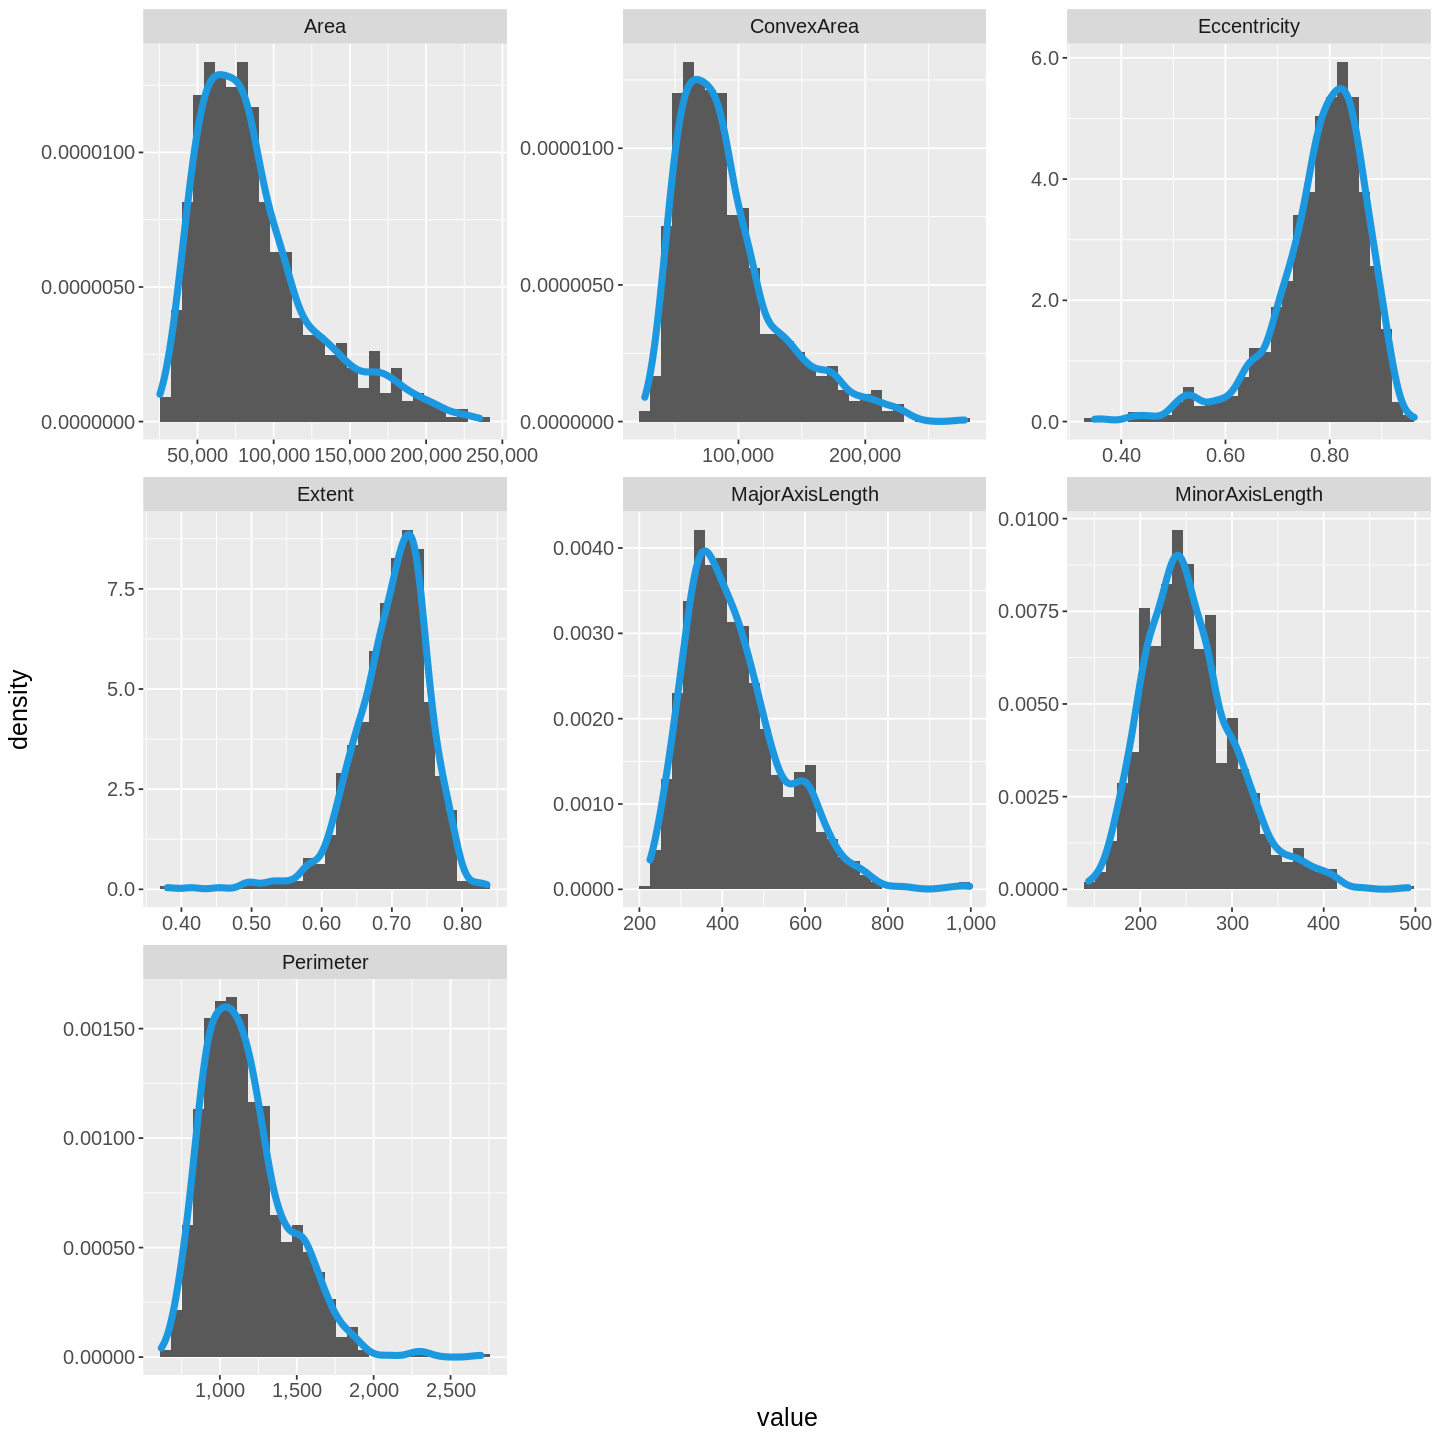

In [5]:
library(ggplot2)
library(tidyr)
# options(repr.matrix.max.rows = 6)
options(repr.plot.height = 12, repr.plot.width = 12)

# setting seed
set.seed(5805)

numerical_raisin_data <- raisin_data %>%
    select(Area:Perimeter)

raisin_data_long <- numerical_raisin_data %>%                        
  pivot_longer(colnames(numerical_raisin_data)) %>% 
  as.data.frame()
print("Peak Values")
head(raisin_data_long)

# distribution plot 
distribution_plot <- ggplot(raisin_data_long, aes(x = value)) +   
  geom_histogram(aes(y = ..density.. )) + 
  geom_density(col = "#1b98e0", size = 2) + 
  facet_wrap(~ name, scales = "free") +
  theme(text = element_text(size = 15))+
  scale_x_continuous(labels = label_comma()) +
  scale_y_continuous(labels = label_comma())
  
print("Distribution plot")
distribution_plot

Here we have made density anddsit'ribution graphs for each possible predictor: Area, ConvexArea, Eccentricity, Extent, MajorAxisLength, MinorAxisLength,  and Perimeter. In order to make these distribution graphs, we had to create a tibble that had the colums of name (column name) and value (**CHECK THIS**). This use of the pivot_longer() function would then allow us to individually create distribution plots for each column which show ... **what do graphs show**

Discussion
First, we use cross-validation to determine K to calculate accuracy. We found an accuracy of 0.8303571. Second, we learned that whichever model was used did not affect the results much, because by comparing the predictions of the KNN model with the predictions of the raisin data and the study model, there was only a small difference between the results of each two models. From the scatter plot, it can be seen that Kecimen's raisin is smaller than Besin's raisin, because the points representing Kecimen's raisin are concentrated towards zero and the points representing Besin's raisin are mostly distributed in the upper right part of the figure. For Raisin's eccentricity, the data show that Kecimen has greater eccentricity but also has a distribution in the small value region In contrast, Besin's raisin has almost no low eccentricity. We actually didn’t expect such a result showing the huge differences between these two kinds of raisins. Before we started the research we thought that the data should be similar since they are both from Turkey. The result indicates that slight differences in origins (including humidity, light, precipitation, etc.) can cause huge differences between two identical products in various aspects. This difference may be too subtle but is crucial for some specific scenarios. For example, Ilkay, Murat and Sakir conducted an experiment using machine recognition to screen for raisin in 2020, in such a situation the difference between two types of raisin could be a problem. Because the machine judges only by the data it receives, maybe data that is bad grading in one type may be good grading in another. This case, combined with our results, made us wonder if we could have an algorithm that could be used to screen all data rather than just specific numerical intervals.